# Big Data Mart Sales Problem


## 1. Data Preprocessing


### Importing The Libraries

In [1962]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


### Loading The Dataset

In [1963]:
# Training Dataset
df_train=pd.read_csv("bigdatamart_Train.csv")
df_test=pd.read_csv("bigdatamart_Test.csv")


### Data Exploration

In [1964]:
#Training Dataset
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1965]:
# Testing Dataset
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [1966]:
#checking shape of training dataset with rows and columns
df_train.shape

(8523, 12)

In our Training Dataset, we have 8523 rows and 12 columns including the target variable "Item_Outlet_Sales".

In [1967]:
#checking shape of testing dataset with rows and columns
df_test.shape

(5681, 11)

In our Testing Dataset, we have 5681 rows and 11 columns. It does not include the target variable as we need to predict it.

In [1968]:
# check the training dataset columns
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [1969]:
# check the testing dataset columns
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [1970]:
# checking the datatypes of training dataset columns
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [1971]:
# Check the name of coloumns which contain string
df_train.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

We have 7 columns having string data in Train dataset.

In [1972]:
# Check the name of coloumns which contain numerical value
df_train.select_dtypes(include=['int64', 'float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

We have 5 columns having numerical data in Train dataset.

In [1973]:
# checking the datatypes of testing dataset columns
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [1974]:
# Check the name of coloumns which contain string
df_test.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

We have 7 columns having string data in Test dataset. 

In [1975]:
# Check the name of coloumns which contain numerical value
df_test.select_dtypes(include=['int64', 'float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

We have 5 columns having numerical data in Test dataset.

In [1976]:
# statistical summary of Training Dataset
df_train.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [1977]:
#checking unique value counts for each column of train dataset
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

From the "Item_Identifier" count we can conclude that there are 1559 unique products across 10 unique stores that is "Outlet_Identifier".

In [1978]:
#checking value counts for Item_Fat_Content for Test data
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Here we see that some of ‘Low Fat’ values miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’. We need to fix them. Count of Low Fat content products is highest.

In [1979]:
#checking value counts for Item_Fat_Content for Test data
df_test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Here also we observe ‘Low Fat’ values miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’.

In [1980]:
#checking value counts for Item_Type for Train Data
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

These are the counts of product "Item_Type". Here large number of products that are sold belongs to "Fruits and Vegetables" and "Snack Foods" category.

In [1981]:
#checking value counts for Item_Type for Test Data
df_test["Item_Type"].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [1982]:
#checking value counts for Outlet_Identifier for Train Data
df_train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

These are the counts of the unique store IDs from where these products are sold.

In [1983]:
#checking value counts for Outlet_Identifier for Test Data
df_test["Outlet_Identifier"].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [1984]:
#checking value counts for Outlet_Establishment_Year for Train Data
df_train["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

"Outlet_Establishment_Year" is the Year in which store is established. From these counts we can infer that most of the sell is done from the oldest store established in the year 1463.

In [1985]:
#checking value counts for Outlet_Establishment_Year for test Data
df_test["Outlet_Establishment_Year"].value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

In [1986]:
#checking value counts for Outlet_Size for Train Data
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

From this we can infer that most of the stores are of Medium size.

In [1987]:
#checking value counts for Outlet_Size for Test Data
df_test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [1988]:
#checking value counts for Outlet_Location_Type for Train Data
df_train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

This shows us that maximum purchase is made from the Tier 3 location stores.

In [1989]:
#checking value counts for Outlet_Location_Type for Test Data
df_test["Outlet_Location_Type"].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [1990]:
#checking value counts for Outlet_Type for Train Data
df_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

This shows us that highest number of stores are of Supermarket Type1.

In [1991]:
#checking value counts for Outlet_Type for Test Data
df_test["Outlet_Type"].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64


### Dealing with Missing Values for Training Dataset

In [1992]:
# checking null value count for training dataset
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

From this we can see that, "Item_Weight" has 1463 NaN value and "Outlet_Size" has 2410 NaN values.

<AxesSubplot:>

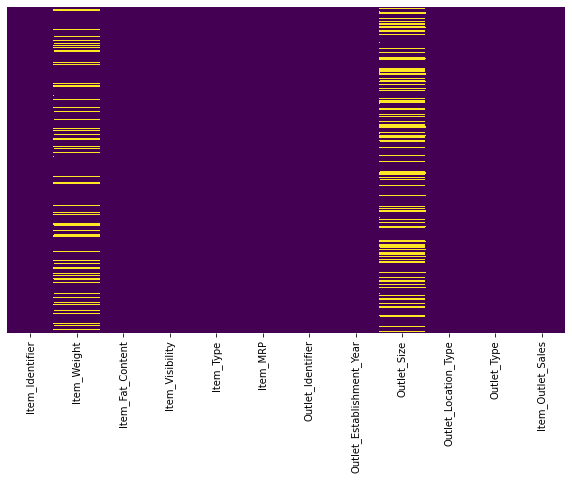

In [1993]:
#Plotting heatmap to show the null values
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

As we can see that "Item_Weight" and "Outlet_Size" have missing values and we can adjust the missing values as enough data is availabe to make predictions.

#### Item_Weight

<AxesSubplot:xlabel='Item_Weight'>

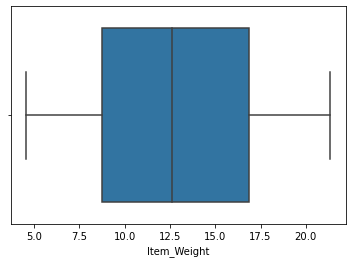

In [1994]:
#plotting boxplot to check outliers for "Item_Weight"
sns.boxplot(df_train["Item_Weight"])

#### Box Plot suggest we dont have any outlier and hence we can change missing values with 'Mean'.

In [1995]:
#sorting values based on Item_Identifier to check Weight item wise
df_train.sort_values(by='Item_Identifier',ascending=False).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


As we know we have 1559 unique products and each product has its unique weight. So here we cannot fill the NaN values just by taking the Mean of the "Item_Weight" column. Here we need to group the weight column on the basis of its unique product and then calculate the mean. From the above sorted values we can conclude that unique product IDs has same weight.

In [1996]:
#filling missing values
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

This way we filled the Item_Weight missing values based on its corresponding Item_Identifier mean weight.

Now let's check the missing values count for Item_Weight

In [1997]:
print(df_train["Item_Weight"].isnull().sum())
df_train[df_train['Item_Weight'].isnull()]

4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


After filling missing values based on Item_Identifier we have 4 NaN values for above Item_Identifier, this is because these are the unique values with no corresponding Item_Weight values. Hence, no mean is calculated for them.

In [1998]:
#checking value counts for the identifiers having NaN values
df_train["Item_Identifier"].value_counts()[1551:]

FDQ60    1
DRF48    1
FDO33    1
FDE52    1
FDN52    1
FDK57    1
FDC23    1
FDT35    1
Name: Item_Identifier, dtype: int64

From this its clear that we have single values for the above 4 Item_Identifiers. We can either delete these 4 rows or else we can fill them with the overall average of Item_Weight, however filling with overall average will hinder our distribution of Item_Weight. Hence, we will delete these 4 missing value entries.

In [1999]:
#deleting those 4 missing values
df_train=df_train.dropna(subset=['Item_Weight'])

Now checking the missing values count for "Item_Weight"!

In [2000]:
df_train["Item_Weight"].isnull().sum()

0

Great! Missing values for Item_Weight are filled. Now lets work on "Outlet_Size".

#### Outlet_Size

Since the Outlet_Size is a categorial variable we can change this missing values using "Mode". Before making the changes, we need to first do analysis with respect to "Outlet_Size".

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

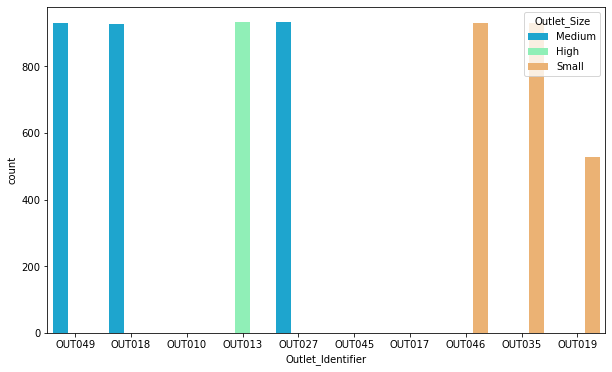

In [2001]:
#plotting bargragh to check Outlet_Size missing values based on Outlet_Identifier
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Identifier",hue="Outlet_Size",data=df_train,palette="rainbow")

#### Above countplot shows that we have no Outlet_Size defined for the below store IDs:
1) OUT010
2) OUT045
3) OUT017

We will fill in the missing values for Outlet_Size based on the Outlet_Type.

In [2002]:
#Getting the Mode value for Outlet_Size based on Outlet_Type
outlet_size_mode = df_train.pivot_table(values="Outlet_Size", columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


So now based on the Outlet_Type, we have the corresponding Outlet_Size. These are the mode values of the corresponding Outlet_Type. As Outlet_Size is a categorical feature we are using mode.

In [2003]:
#filling the missing values
miss_bool=df_train["Outlet_Size"].isnull()
df_train.loc[miss_bool,'Outlet_Size']=df_train.loc[miss_bool,"Outlet_Type"].apply(lambda x:outlet_size_mode[x])

Now checking the missing values count for "Outlet_Size"!

In [2004]:
df_train['Outlet_Size'].isnull().sum()

0

Great! Missing values for Outlet_Size are filled. Now we need to check if Item_Visibility has any values equal to zero.

#### Item_Visibility

In [2005]:
#checking total number of entires having zero as Item_Visibility
sum(df_train["Item_Visibility"]==0)

526

In [2006]:
#replace zeros with mean
df_train.loc[:,"Item_Visibility"].replace([0],[df_train['Item_Visibility'].mean()],inplace=True)

Now let's again check the sum of Zero values for Item_Visibility.

In [2007]:
sum(df_train["Item_Visibility"]==0)

0

Great! Now the sum is zero. That means zeros values are filled.

### Dealing with Missing Values for Testing Dataset

In [2008]:
# checking null value count for training dataset
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

From this we can see that, "Item_Weight" has 976 NaN value and "Outlet_Size" has 1606 NaN values.

We will treat the missing values of "Item_Weight" and "Outlet_Size" similar to Train dataset.

<AxesSubplot:xlabel='Item_Weight'>

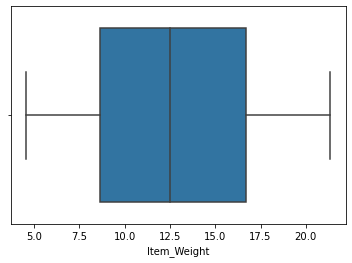

In [2009]:
#plotting boxplot to check outliers for "Item_Weight"
sns.boxplot(df_test["Item_Weight"])

#### Box Plot suggest we dont have any outlier and hence we can change missing values with 'Mean'.

In [2010]:
#sorting values based on Item_Identifier to check Weight item wise
df_test.sort_values(by='Item_Identifier',ascending=False).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2907,NCZ54,14.65,Low Fat,0.083344,Household,163.6552,OUT035,2004,Small,Tier 2,Supermarket Type1
4700,NCZ54,14.65,Low Fat,0.083831,Household,161.4552,OUT017,2007,NaN,Tier 2,Supermarket Type1
4307,NCZ54,14.65,Low Fat,0.083290,Household,160.4552,OUT013,1987,High,Tier 3,Supermarket Type1
2875,NCZ53,9.60,Low Fat,0.024527,Health and Hygiene,188.5214,OUT045,2002,NaN,Tier 2,Supermarket Type1
2318,NCZ53,9.60,Low Fat,0.024616,Health and Hygiene,190.0214,OUT017,2007,NaN,Tier 2,Supermarket Type1


We will fill the missing values based on the Item_Identifier as we did for Training Dataset. Here we are using the same grouping of Training dataset as with Testing data we are getting more NaN values as it does not have much entries compared to Training data. Also the products are same so it makes sense.

In [2011]:
#filling missing values
df_test['Item_Weight'] = df_train['Item_Weight'].fillna(df_train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

Now let's check the missing values count for Item_Weight

In [2012]:
print(df_test["Item_Weight"].isnull().sum())
df_test[df_test['Item_Weight'].isnull()]

4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
927,FDI34,NaN,Regular,0.085065,Snack Foods,228.9668,OUT013,1987,High,Tier 3,Supermarket Type1
1922,FDA14,NaN,Low Fat,0.065315,Dairy,147.1760,OUT045,2002,NaN,Tier 2,Supermarket Type1
4187,FDP45,NaN,Regular,0.053620,Snack Foods,250.4724,OUT019,1985,Small,Tier 1,Grocery Store
5022,NCK31,NaN,LF,0.027090,Others,50.6666,OUT049,1999,Medium,Tier 1,Supermarket Type1


Here again we got 4 NaN values and the reason is same as we discussed above. We will delete these 4 entries as we did before. If later our model building is affected by this, then we will replace these NaN values with overall average of Item_Weight.

In [2013]:
#deleting those 4 missing values
df_test=df_test.dropna(subset=['Item_Weight'])

Now checking the missing values count for "Item_Weight"!

In [2014]:
df_test["Item_Weight"].isnull().sum()

0

Great! Missing values for Item_Weight are filled. Now lets work on "Outlet_Size".

#### Outlet_Size

Doing analysis for testing dataset

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

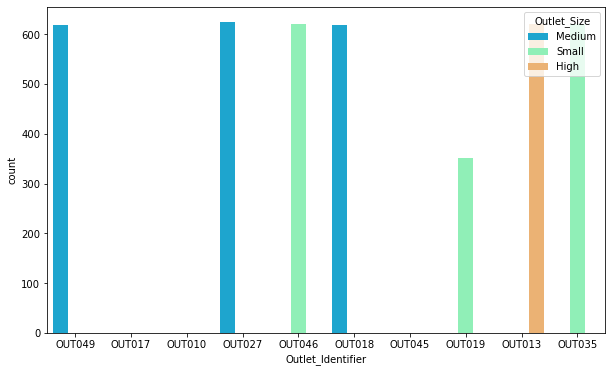

In [2015]:
#plotting bargragh to check Outlet_Size missing values based on Outlet_Identifier
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Identifier",hue="Outlet_Size",data=df_test,palette="rainbow")

#### Here also we observe the same that we have no Outlet_Size defined for the below store IDs:
1) OUT010
2) OUT045
3) OUT017

For testing data too we will fill in the missing values for Outlet_Size based on the Outlet_Type.

In [2016]:
#Getting the Mode value for Outlet_Size based on Outlet_Type
outlet_size_mode = df_test.pivot_table(values="Outlet_Size", columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


So now based on the Outlet_Type, we have the corresponding Outlet_Size.

In [2017]:
#filling the missing values
miss_bool=df_test["Outlet_Size"].isnull()
df_test.loc[miss_bool,'Outlet_Size']=df_test.loc[miss_bool,"Outlet_Type"].apply(lambda x:outlet_size_mode[x])

Now checking the missing values count for "Outlet_Size"!

In [2018]:
df_test['Outlet_Size'].isnull().sum()

0

Great! Missing values for Outlet_Size are filled. Now we will work on Item_Visibility.

#### Item_Visibility

In [2019]:
#checking total number of entires having zero as Item_Visibility
sum(df_test["Item_Visibility"]==0)

353

We have 353 values of zero in Item_Visibility. Let's fill them with mean value.

In [2020]:
#replace zeros with mean
df_test.loc[:,"Item_Visibility"].replace([0],[df_test['Item_Visibility'].mean()],inplace=True)

Now let's again check the sum of Zero values for Item_Visibility.

In [2021]:
sum(df_train["Item_Visibility"]==0)

0

Great! Now the sum is zero. That means zeros values are filled.


### Cleaning The Data for Training Dataset

#### Item_Fat_Content

As we discussed above, we need to fix the values for "Item_Fat_Content" column.

In [2022]:
#replacing the miscoded values
df_train["Item_Fat_Content"].replace(["LF","low fat","reg"],["Low Fat","Low Fat",'Regular'],inplace=True)
df_train["Item_Fat_Content"].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

Great! Now its fixed!


#### Item_Identifier

#### From the Item_Identifier we can extract new categories where:
    FD => Food
    DR => Drinks
    NC => Non-Consumable

In [2023]:
#Getting first two letters of the product ID
df_train["Primary_Item_Type"]=df_train["Item_Identifier"].apply(lambda x:x[:2])
df_train["Primary_Item_Type"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Primary_Item_Type, Length: 8519, dtype: object

Let's change these values to a meaningful name.

In [2024]:
#Giving meaningful names to the categories
df_train["Primary_Item_Type"]=df_train["Primary_Item_Type"].replace(["FD","DR","NC"],["Food","Drinks","Non-Consumable"])
df_train["Primary_Item_Type"].value_counts()

Food              6121
Non-Consumable    1599
Drinks             799
Name: Primary_Item_Type, dtype: int64

Now we have three broad categories of Food, Drinks and Non-Consumable. We can use this Non-Consumable category in Item_Fat_Content to represent a Non-Edible category in Low Fat and Regular categories.

In [2025]:
#Adding new category 
df_train.loc[df_train["Primary_Item_Type"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
df_train["Item_Fat_Content"].value_counts()

Low Fat       3917
Regular       3003
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Now we have three categories in Item_Fat_Content. This Non-Edible products are not consumable.

#### Outlet_Establishment_Year

In this column, the year is established as it is . So if we use it directly, then it will decrease the model performance because these are big values. In order to avoid this we will use some small values. As the dataset was collected in the year 2013, so we will negate 2013 minus this particular year and we will have a new value that is lesser. We will create a new attribute for this. 

In [2026]:
#create small values for establishment year
df_train["Outlet_Years"]=2013 - df_train["Outlet_Establishment_Year"]
df_train["Outlet_Years"]

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8519, dtype: int64

Now the values are small and hence the model performance won't be affected by this.


### Cleaning The Data for Testing Dataset

We will do the similar Data Cleaning for Testing data as we did for Training data.

#### Item_Fat_Content

In [2027]:
#replacing the miscoded values
df_test["Item_Fat_Content"].replace(["LF","low fat","reg"],["Low Fat","Low Fat",'Regular'],inplace=True)
df_test["Item_Fat_Content"].value_counts()

Low Fat    3666
Regular    2011
Name: Item_Fat_Content, dtype: int64

#### Item_Identifier

In [2028]:
#Getting first two letters of the product ID
df_test["Primary_Item_Type"]=df_test["Item_Identifier"].apply(lambda x:x[:2])
df_test["Primary_Item_Type"]

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Primary_Item_Type, Length: 5677, dtype: object

Changing these values to meaningful names

In [2029]:
#Giving meaningful names to the categories
df_test["Primary_Item_Type"]=df_test["Primary_Item_Type"].replace(["FD","DR","NC"],["Food","Drinks","Non-Consumable"])
df_test["Primary_Item_Type"].value_counts()

Food              4073
Non-Consumable    1086
Drinks             518
Name: Primary_Item_Type, dtype: int64

Now adding new category of Non-Edible to Item_Fat_Content based on the Non-Consumable category.

In [2030]:
df_test.loc[df_test["Primary_Item_Type"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
df_test["Item_Fat_Content"].value_counts()

Low Fat       2580
Regular       2011
Non-Edible    1086
Name: Item_Fat_Content, dtype: int64

Great! Its fixed!

#### Outlet_Establishment_Year

In [2031]:
#create small values for establishment year
df_test["Outlet_Years"]=2013 - df_test["Outlet_Establishment_Year"]
df_test["Outlet_Years"]

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5677, dtype: int64

Now, the values are small for Testing data too.

## Exploratory Data Analysis

### A] Univariate Analysis

In [2032]:
# Check the name of coloumns which contain string
df_train.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Primary_Item_Type'],
      dtype='object')

#### 1. Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

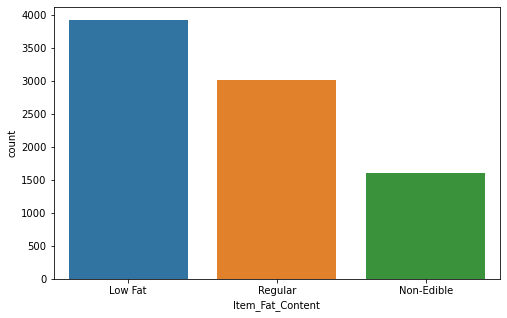

In [2033]:
plt.figure(figsize=(8,5))
sns.countplot(x="Item_Fat_Content",data=df_train)

#### Observation:
People preferred and bought more Low Fat items.


#### 2. Item_Type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

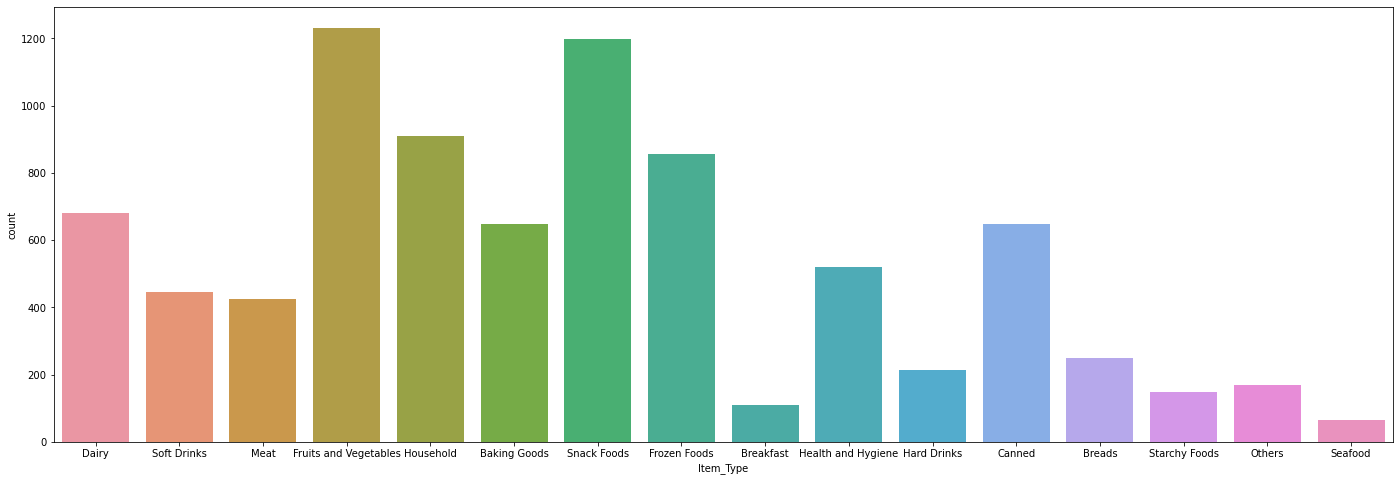

In [2034]:
plt.figure(figsize=(24,8))
sns.countplot(x="Item_Type",data=df_train)

#### Observation:
    People bought more Fruits and Vegetables and Snack Foods, and it make sense.


#### 3. Outlet_Identifier

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

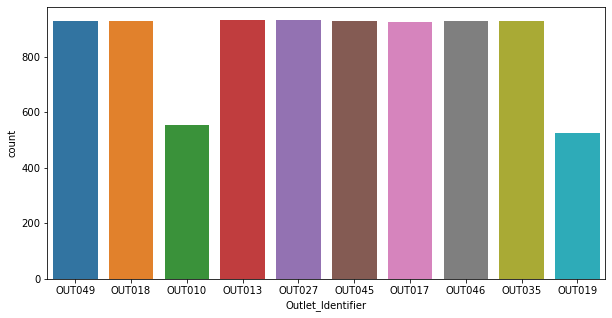

In [2035]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Identifier",data=df_train)

#### Observation:
    Less purchase was made from the stores OUT010 and OUT019


#### 4. Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

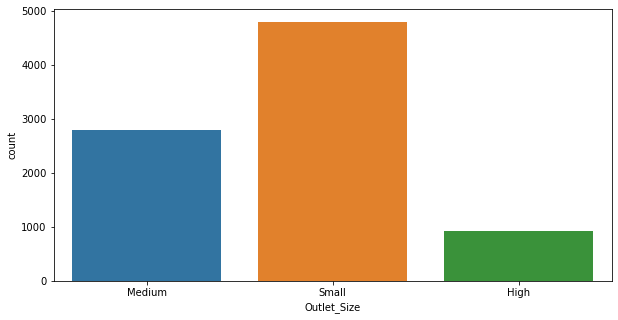

In [2036]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Size",data=df_train)

#### Observation:
    Maximum purchase was made from Small sized outlets.


#### 5. Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

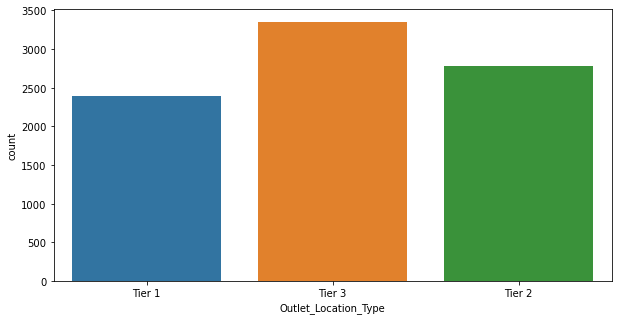

In [2037]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Location_Type",data=df_train)

#### Observation:
        Maximum purchase was made from Tier 3 location stores.


#### 6. Outlet_Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

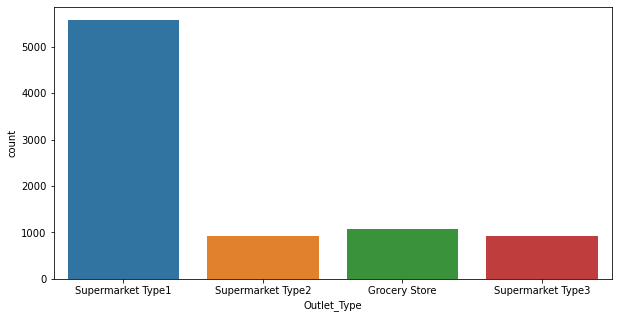

In [2038]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Type",data=df_train)

#### Observation:
        Maximum purchase was made from Supermarket Type1.

#### Outlet_Establishment_Year

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

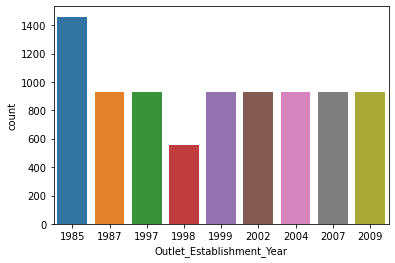

In [2039]:
sns.countplot(df_train["Outlet_Establishment_Year"])

#### Observation:
    Here we observe that all the outlets were established in equal distribution. Only one has more number of counts that is 1985. At that time more number of stores were established.

In [2040]:
# Check the name of coloumns which contain numerical value
df_train.select_dtypes(include=['int64', 'float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Years'],
      dtype='object')

#### 1. Item_Weight

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

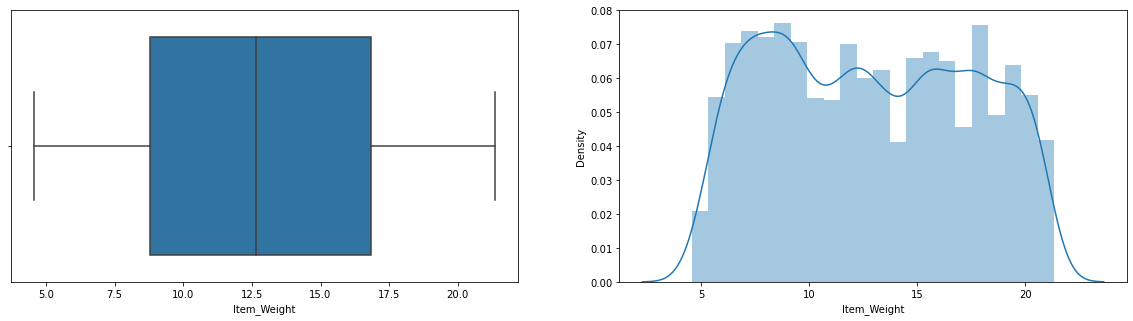

In [2041]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df_train["Item_Weight"])
plt.subplot(1,2,2)
sns.distplot(df_train["Item_Weight"])

#### Observation:
    There are no outliers present and the distribution is approximately normal.


#### 2. Item_Visibility

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

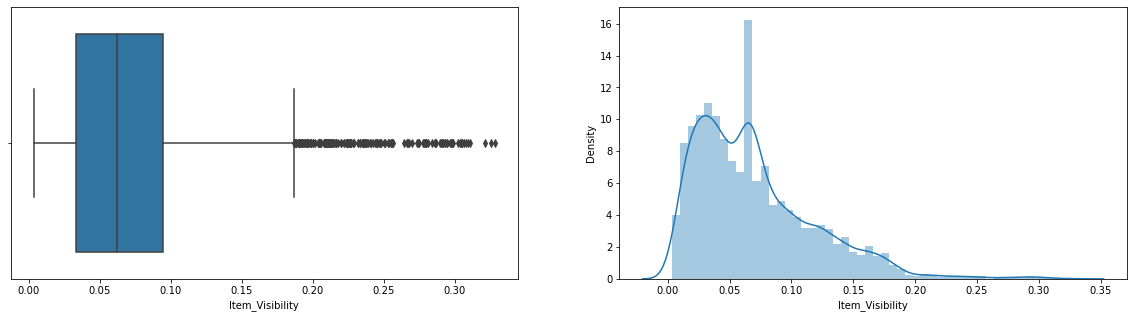

In [2042]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df_train["Item_Visibility"])
plt.subplot(1,2,2)
sns.distplot(df_train["Item_Visibility"])

#### Observation:
    Extreme outliers are present and somewhat we have less skewed values and we tried to avoid zero. There is a high peak at the centre as we filled all the zero values with mean.


#### 3. Item_MRP

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

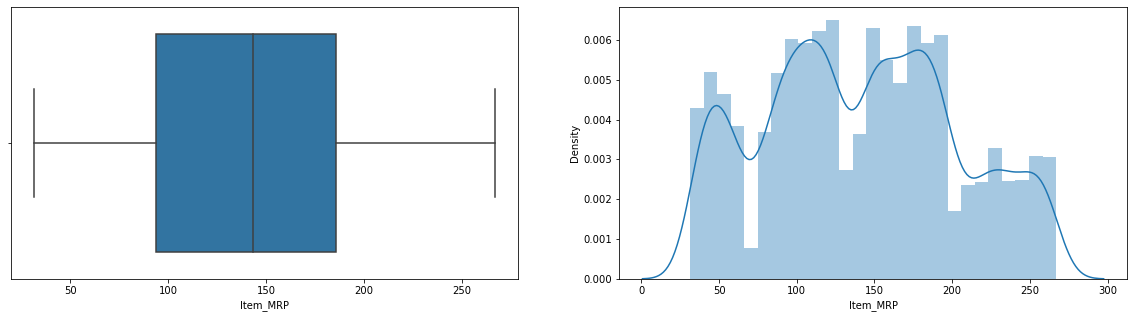

In [2043]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df_train["Item_MRP"])
plt.subplot(1,2,2)
sns.distplot(df_train["Item_MRP"])

#### Observation:
    There are no outliers present and the distribution is not normal. The prices of items ranges from around 30 to 270. Price ranges from different categories.


#### 4. Item_Outlet_Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

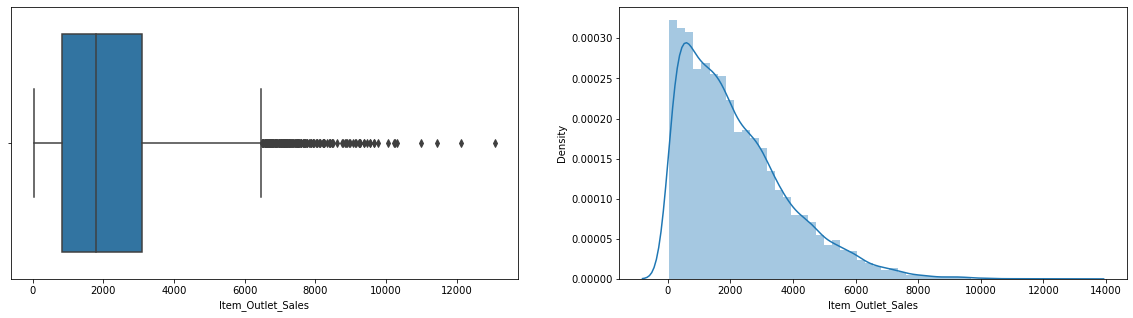

In [2044]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df_train["Item_Outlet_Sales"])
plt.subplot(1,2,2)
sns.distplot(df_train["Item_Outlet_Sales"])

#### Observation:
    There are extreme outliers present and distribution is right skewed. The sales is ranging from 0 to 14,000. 

### B] Bivariate Analysis

In [2045]:
# Check the name of coloumns which contain string
df_train.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Primary_Item_Type'],
      dtype='object')

#### 1. Item_Fat_Content to Item_Outlet_Sales

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

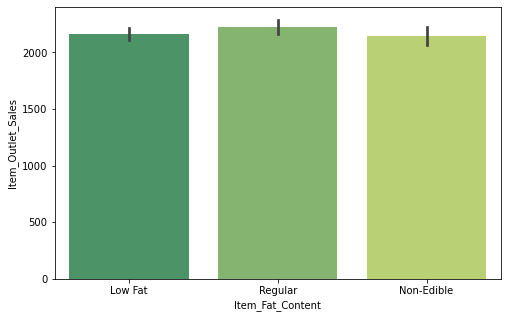

In [2046]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=df_train,palette='summer')

#### Observation:
    Low Fat,Regular and Non-Edible are equally contributing to the Sales.


#### 2. Item_Type to Item_Outlet_Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

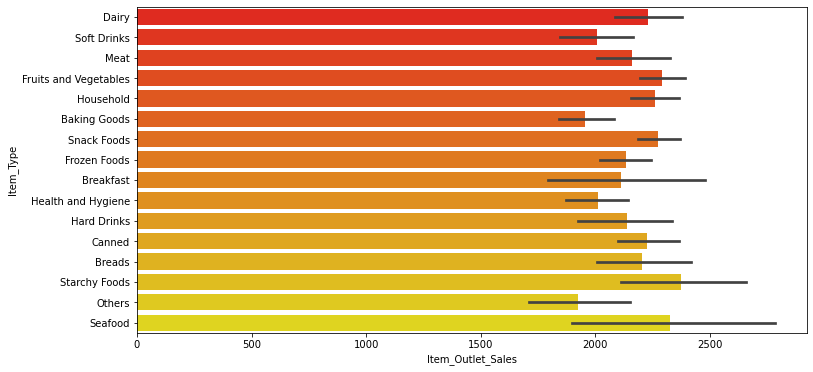

In [2047]:
plt.figure(figsize=(12,6))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df_train,palette='autumn')

#### Observation:
    Although maximum units sold are from Fruits and Vegetables and Snack Foods category, however Sales is much higher for Starchy Foods and Seafood products.

#### 3. Outlet_Identifier to Item_Outlet_Sales

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

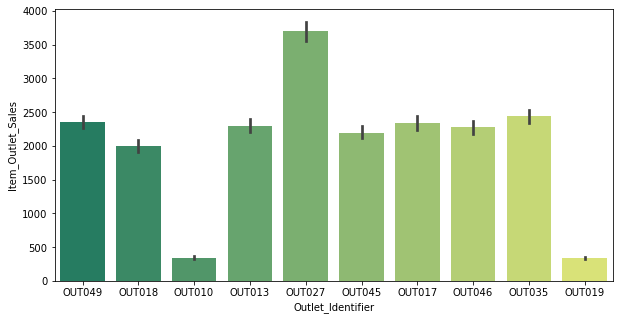

In [2048]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Identifier','Item_Outlet_Sales',data=df_train,palette='summer')

#### Observation:
    Maximum sale is made from the "OUT027" store.

#### 4. Outlet_Size to Item_Outlet_Sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

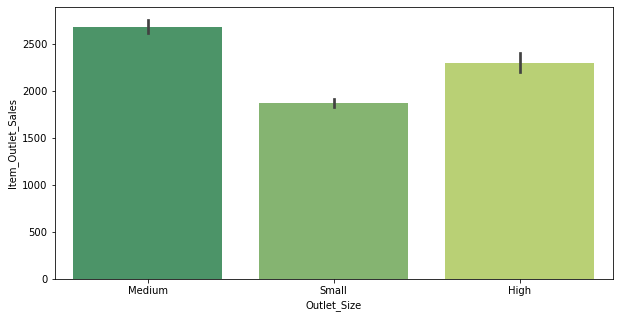

In [2049]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=df_train,palette='summer')

#### Observation:
    Maximum sale is made from Medium and High sized outlet.

#### 5. Outlet_Location_Type to Item_Outlet_Sales

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

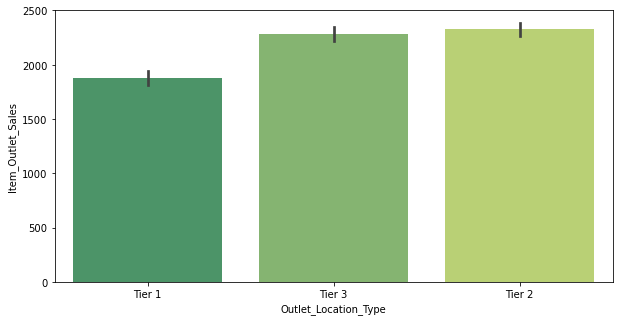

In [2050]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',data=df_train,palette='summer')

#### Observation:
    Tier 3 and 2 gives the maximum contribution to the Sales and it make sense as maximum sale was made from Tier 3 Location.

#### 6. Outlet_Type to Item_Outlet_Sales

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

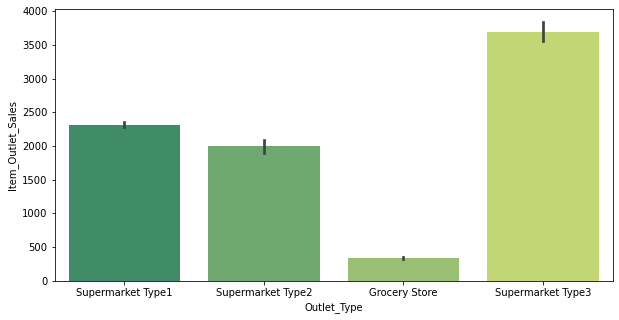

In [2051]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type','Item_Outlet_Sales',data=df_train,palette='summer')

#### Observation:
    Maximum sale is made from Supermarket Type3 and least sale is made from Grocery Store.

In [2052]:
# Check the name of coloumns which contain string
df_train.select_dtypes(include=['int64', 'float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Years'],
      dtype='object')

#### 1. Item_Visibility to Item_Outlet_Sales

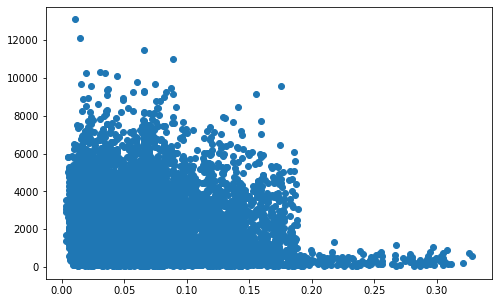

In [2053]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df_train)

#### Observation:
    Here we observe an interesting pattern that where the visibility of items is near to zero which means those items kept behind the shelf and almost have no visibility can also be sold. This shows that Customers tend to search for their own products.

#### 2. Item_MRP to Item_Outlet_Sales

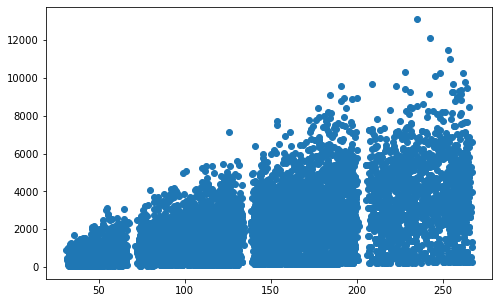

In [2054]:
plt.figure(figsize=(8,5))
plt.scatter('Item_MRP','Item_Outlet_Sales',data=df_train)

#### Observation:
    Items with higher MRP are giving mhigher Sales.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

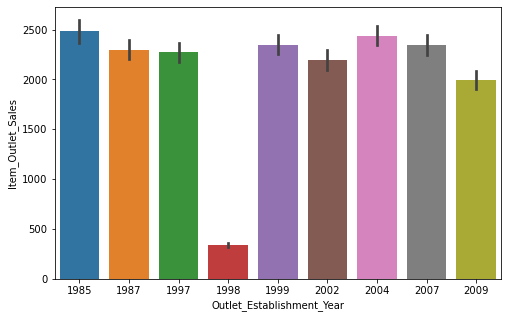

In [2055]:
plt.figure(figsize=(8,5))
sns.barplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=df_train)

#### Observation:
    Maximum sale was made in the year 1985 and there was a deep drop in sales for year 1998.

### C] Multivariate Analysis

#### 1. Item_Type by Item_Fat_Content to Item_Outlet_Sales

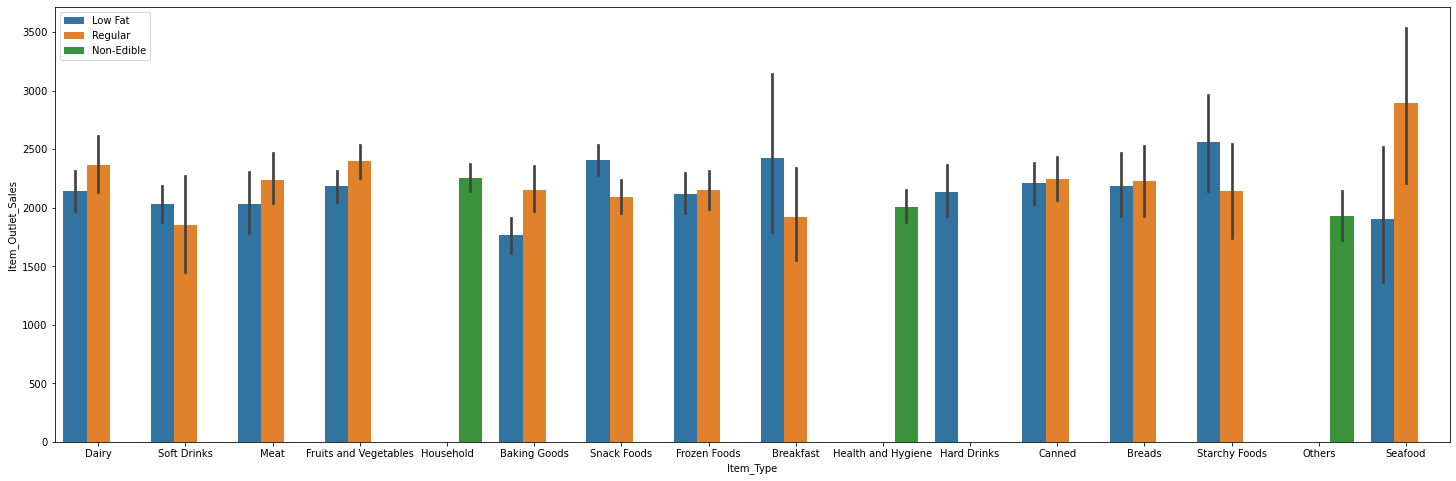

In [2056]:
plt.figure(figsize=(25,8))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df_train)
plt.legend()

#### Observation:
    Mostly we have equal revenue generation from Low Fat and Regular food  and Non-Edible items.

#### 2. Outlet_Location_Type by Outlet_Type to Item_Outlet_Sales

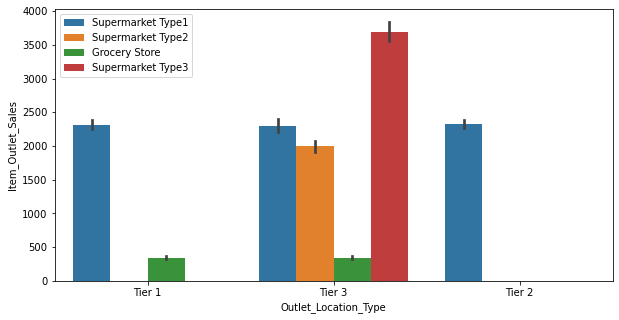

In [2057]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df_train)
plt.legend()

#### Observation:
    Maximum sale is made from Supermarket Type3 of Tier 3 Location and least sale is made from the Grocery stores of Tier 2 and Tier 3 locations.

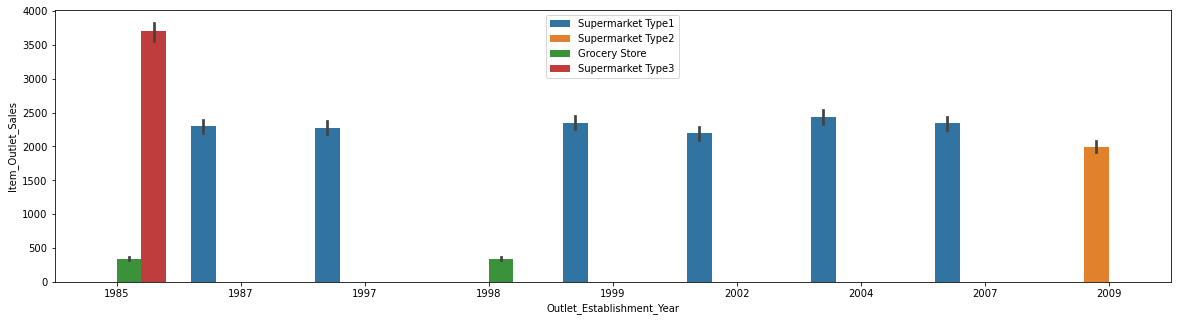

In [2058]:
plt.figure(figsize=(20,5))
sns.barplot('Outlet_Establishment_Year','Item_Outlet_Sales',hue='Outlet_Type',data=df_train)
plt.legend()

#### Observation:
    Maximum sale was made in the year 1985 by Supermarket Type3 and the overall least sale was made by Grocery stores.

### Correlation Matrix

<AxesSubplot:>

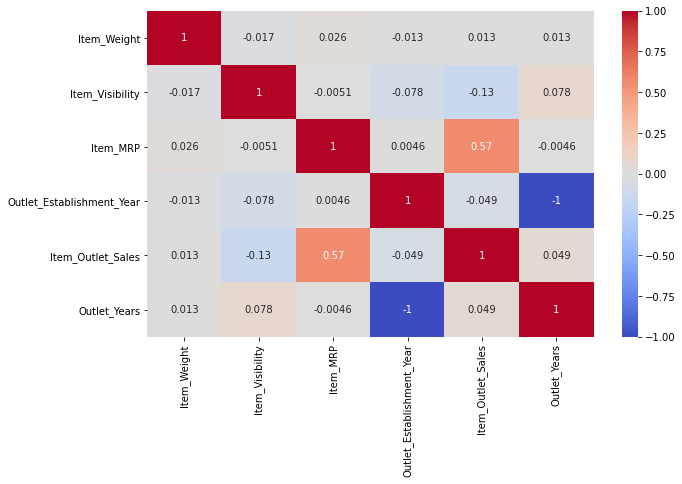

In [2059]:
#checking the correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(),cmap="coolwarm",annot=True)

## Feature Engineering for Training Dataset

### Label Encoding

In [2060]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
features=["Outlet_Identifier","Item_Type"]
for i in features:
    df_train[i]=LE.fit_transform(df_train[i])

In [2061]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Primary_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066112,6,182.0950,0,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066112,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


### One Hot Encoding

In [2062]:
df_train=pd.get_dummies(df_train,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Primary_Item_Type"])
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Primary_Item_Type_Drinks,Primary_Item_Type_Food,Primary_Item_Type_Non-Consumable
0,FDA15,9.30,0.016047,4,249.8092,9,1999,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,3,2009,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,9,1999,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066112,6,182.0950,0,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066112,9,53.8614,1,1987,994.7052,26,0,...,0,0,1,0,1,0,0,0,0,1


With this all the categorical columns for training dataset are converted to numerical.

## Feature Engineering for Testing Dataset

### Label Encoding

In [2063]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
features=["Outlet_Identifier","Item_Type"]
for i in features:
    df_test[i]=LE.fit_transform(df_test[i])

In [2064]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Primary_Item_Type,Outlet_Years
0,FDW58,9.30,Low Fat,0.007565,13,107.8622,9,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,FDW14,5.92,Regular,0.038428,4,87.3198,2,2007,Small,Tier 2,Supermarket Type1,Food,6
2,NCN55,17.50,Non-Edible,0.099575,11,241.7538,0,1998,Small,Tier 3,Grocery Store,Non-Consumable,15
3,FDQ58,19.20,Low Fat,0.015388,13,155.0340,2,2007,Small,Tier 2,Supermarket Type1,Food,6
4,FDY38,8.93,Regular,0.118599,4,234.2300,5,1985,Medium,Tier 3,Supermarket Type3,Food,28


### One Hot Encoding

In [2065]:
df_test=pd.get_dummies(df_test,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Primary_Item_Type"])
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Primary_Item_Type_Drinks,Primary_Item_Type_Food,Primary_Item_Type_Non-Consumable
0,FDW58,9.30,0.007565,13,107.8622,9,1999,14,1,0,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,5.92,0.038428,4,87.3198,2,2007,6,0,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,17.50,0.099575,11,241.7538,0,1998,15,0,1,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,19.20,0.015388,13,155.0340,2,2007,6,1,0,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,8.93,0.118599,4,234.2300,5,1985,28,0,0,...,0,0,1,0,0,0,1,0,1,0


With this all the categorical columns for training dataset are converted to numerical.

### Removing Outliers for Train Dataset columns

In [2066]:
#removing outliers for "Item_Visibility",'Item_Outlet_Sales' columns
from scipy.stats import zscore
z=np.abs(zscore(df_train[["Item_Visibility",'Item_Outlet_Sales']]))
dftrain_new=df_train[(z<3).all(axis=1)]

#### Plotting boxplots after removing outlliers

<AxesSubplot:xlabel='Item_Outlet_Sales'>

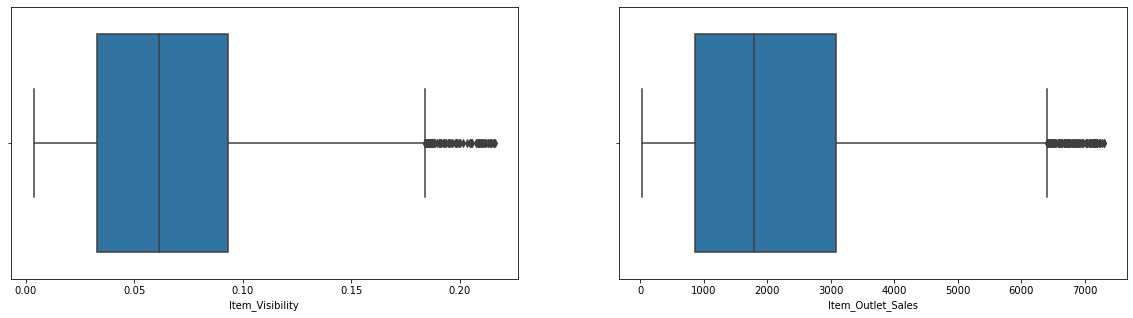

In [2067]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(dftrain_new["Item_Visibility"])
plt.subplot(1,2,2)
sns.boxplot(dftrain_new["Item_Outlet_Sales"])

Even after removing outliers, there are some present.

In [2068]:
dftrain_new.shape

(8330, 25)

After removing outliers, we have 8364 rows and 16 columns.

### Percentage of data loss:

In [2069]:
data_loss=(8523-dftrain_new.shape[0])/8523*100
print("{:.2f}".format(data_loss),"%")

2.26 %


There is 1.87% of data loss with the outlier removal. To some extent outliers are removed

### Removing Outliers for Train Dataset columns

<AxesSubplot:xlabel='Item_Visibility'>

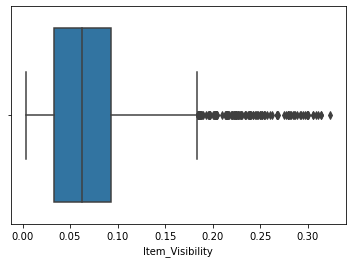

In [2070]:
sns.boxplot(df_test["Item_Visibility"])

In [2071]:
#removing outliers for "Item_Visibility" column
from scipy.stats import zscore
z=np.abs(zscore(df_test[["Item_Visibility"]]))
dftest_new=df_test[(z<3).all(axis=1)]

#### Plotting boxplots after removing outlliers

<AxesSubplot:xlabel='Item_Visibility'>

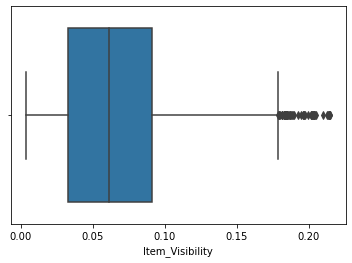

In [2072]:
sns.boxplot(dftest_new["Item_Visibility"])

Even after removing outliers, there are some present.

In [2073]:
dftest_new.shape

(5592, 24)

### Percentage of data loss:

In [2074]:
data_loss=(5681-dftest_new.shape[0])/5681*100
print("{:.2f}".format(data_loss),"%")

1.57 %


There is 1.57% of data loss with the outlier removal. To some extent outliers are removed

### Creating X an Y Split

In [2075]:
x=dftrain_new.drop(columns=["Item_Outlet_Sales","Outlet_Establishment_Year","Item_Identifier"])
y=dftrain_new["Item_Outlet_Sales"]

### Deleting columns from Test Dataset

In [2076]:
dftest_new=dftest_new.drop(columns=["Outlet_Establishment_Year","Item_Identifier"])

### Checking and Removing Skewness for Train Dataset

In [2077]:
df_train.skew()

Item_Weight                         0.070315
Item_Visibility                     1.287684
Item_Type                           0.101516
Item_MRP                            0.126533
Outlet_Identifier                  -0.059833
Outlet_Establishment_Year          -0.397672
Item_Outlet_Sales                   1.178129
Outlet_Years                        0.397672
Item_Fat_Content_Low Fat            0.161368
Item_Fat_Content_Non-Edible         1.599899
Item_Fat_Content_Regular            0.617560
Outlet_Size_High                    2.503119
Outlet_Size_Medium                  0.735249
Outlet_Size_Small                  -0.254456
Outlet_Location_Type_Tier 1         0.979041
Outlet_Location_Type_Tier 2         0.738091
Outlet_Location_Type_Tier 3         0.438715
Outlet_Type_Grocery Store           2.240678
Outlet_Type_Supermarket Type1      -0.650632
Outlet_Type_Supermarket Type2       2.510862
Outlet_Type_Supermarket Type3       2.503119
Primary_Item_Type_Drinks            2.787169
Primary_It

This is the skewness before removing outliers.

In [2078]:
x.skew()

Item_Weight                         0.069920
Item_Visibility                     0.864285
Item_Type                           0.097992
Item_MRP                            0.138202
Outlet_Identifier                  -0.065438
Outlet_Years                        0.424921
Item_Fat_Content_Low Fat            0.165782
Item_Fat_Content_Non-Edible         1.584388
Item_Fat_Content_Regular            0.621076
Outlet_Size_High                    2.472529
Outlet_Size_Medium                  0.735892
Outlet_Size_Small                  -0.247291
Outlet_Location_Type_Tier 1         0.985715
Outlet_Location_Type_Tier 2         0.712207
Outlet_Location_Type_Tier 3         0.456673
Outlet_Type_Grocery Store           2.368518
Outlet_Type_Supermarket Type1      -0.703608
Outlet_Type_Supermarket Type2       2.470600
Outlet_Type_Supermarket Type3       2.583036
Primary_Item_Type_Drinks            2.783004
Primary_Item_Type_Food             -0.960615
Primary_Item_Type_Non-Consumable    1.584388
dtype: flo

We can ignore the skewness of categorical columns. Here we have skewness only for "Item_Visibility".

In [2079]:
x["Item_Visibility"]=np.sqrt(x["Item_Visibility"])

In [2080]:
x.skew()

Item_Weight                         0.069920
Item_Visibility                     0.225620
Item_Type                           0.097992
Item_MRP                            0.138202
Outlet_Identifier                  -0.065438
Outlet_Years                        0.424921
Item_Fat_Content_Low Fat            0.165782
Item_Fat_Content_Non-Edible         1.584388
Item_Fat_Content_Regular            0.621076
Outlet_Size_High                    2.472529
Outlet_Size_Medium                  0.735892
Outlet_Size_Small                  -0.247291
Outlet_Location_Type_Tier 1         0.985715
Outlet_Location_Type_Tier 2         0.712207
Outlet_Location_Type_Tier 3         0.456673
Outlet_Type_Grocery Store           2.368518
Outlet_Type_Supermarket Type1      -0.703608
Outlet_Type_Supermarket Type2       2.470600
Outlet_Type_Supermarket Type3       2.583036
Primary_Item_Type_Drinks            2.783004
Primary_Item_Type_Food             -0.960615
Primary_Item_Type_Non-Consumable    1.584388
dtype: flo

### Checking and Removing Skewness for Test Dataset

In [2081]:
df_test.skew()

Item_Weight                         0.054162
Item_Visibility                     1.372117
Item_Type                           0.097149
Item_MRP                            0.136428
Outlet_Identifier                  -0.060164
Outlet_Establishment_Year          -0.396779
Outlet_Years                        0.396779
Item_Fat_Content_Low Fat            0.182947
Item_Fat_Content_Non-Edible         1.570125
Item_Fat_Content_Regular            0.609692
Outlet_Size_High                    2.506466
Outlet_Size_Medium                  0.733811
Outlet_Size_Small                  -0.253983
Outlet_Location_Type_Tier 1         0.979789
Outlet_Location_Type_Tier 2         0.738928
Outlet_Location_Type_Tier 3         0.437556
Outlet_Type_Grocery Store           2.240964
Outlet_Type_Supermarket Type1      -0.648664
Outlet_Type_Supermarket Type2       2.512285
Outlet_Type_Supermarket Type3       2.494902
Primary_Item_Type_Drinks            2.839741
Primary_Item_Type_Food             -0.966221
Primary_It

In [2082]:
dftest_new.skew()

Item_Weight                         0.057890
Item_Visibility                     0.860533
Item_Type                           0.092473
Item_MRP                            0.133402
Outlet_Identifier                  -0.070160
Outlet_Years                        0.412653
Item_Fat_Content_Low Fat            0.180318
Item_Fat_Content_Non-Edible         1.562421
Item_Fat_Content_Regular            0.616973
Outlet_Size_High                    2.479385
Outlet_Size_Medium                  0.709859
Outlet_Size_Small                  -0.226826
Outlet_Location_Type_Tier 1         1.000859
Outlet_Location_Type_Tier 2         0.714994
Outlet_Location_Type_Tier 3         0.442613
Outlet_Type_Grocery Store           2.433919
Outlet_Type_Supermarket Type1      -0.695377
Outlet_Type_Supermarket Type2       2.485177
Outlet_Type_Supermarket Type3       2.467876
Primary_Item_Type_Drinks            2.833191
Primary_Item_Type_Food             -0.959363
Primary_Item_Type_Non-Consumable    1.562421
dtype: flo

Here also we have skewness only for Item_Visibility

In [2083]:
dftest_new["Item_Visibility"]=np.sqrt(dftest_new["Item_Visibility"])

In [2084]:
dftest_new.skew()

Item_Weight                         0.057890
Item_Visibility                     0.205119
Item_Type                           0.092473
Item_MRP                            0.133402
Outlet_Identifier                  -0.070160
Outlet_Years                        0.412653
Item_Fat_Content_Low Fat            0.180318
Item_Fat_Content_Non-Edible         1.562421
Item_Fat_Content_Regular            0.616973
Outlet_Size_High                    2.479385
Outlet_Size_Medium                  0.709859
Outlet_Size_Small                  -0.226826
Outlet_Location_Type_Tier 1         1.000859
Outlet_Location_Type_Tier 2         0.714994
Outlet_Location_Type_Tier 3         0.442613
Outlet_Type_Grocery Store           2.433919
Outlet_Type_Supermarket Type1      -0.695377
Outlet_Type_Supermarket Type2       2.485177
Outlet_Type_Supermarket Type3       2.467876
Primary_Item_Type_Drinks            2.833191
Primary_Item_Type_Food             -0.959363
Primary_Item_Type_Non-Consumable    1.562421
dtype: flo

### Scaling for Train Dataset

There is a difference between the range of values for many independent variables. Hence, we are scaling.

In [2085]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
x_scaled=MM.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [2086]:
x.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Primary_Item_Type_Drinks,Primary_Item_Type_Food,Primary_Item_Type_Non-Consumable
0,0.282525,0.165029,0.266667,0.927507,1.000000,0.416667,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.081274,0.195051,0.933333,0.072068,0.333333,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.770765,0.171895,0.666667,0.468288,1.000000,0.416667,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.871986,0.486865,0.400000,0.640093,0.000000,0.458333,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.260494,0.486865,0.600000,0.095805,0.111111,0.916667,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### As we have observed very big values for Item_Outlet_Sales we need to transform them so that the model building won't be biased.

In [2087]:
y=np.log(1+y)

Now, all the features values are scaled and the model building will not be biased.

### Scaling for Test Dataset

In [2088]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
x_test=MM.fit_transform(dftest_new)
x_pred=pd.DataFrame(x_test,columns=dftest_new.columns)

Also, the Test Dataset is scaled.

As we have only 22 features in our dataset, we will not perform PCA.

## C] Building the Model

In [2089]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Finding the Best Random State

In [2090]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.7361782376825888  on Random State  123


Using the best Random State to create new train_test_split.

In [2091]:
#creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [2092]:
#pip install xgboost

In [2093]:
#Importing the algorithmns to build models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### 1. LinearRegression

Mean absolute error: 0.41733942177238986
Mean squared error: 0.2889894221747032
Root Mean squared error: 0.5375773638972378
R2 Score: 0.7241584700955567


<AxesSubplot:title={'center':'Model Coeficients'}>

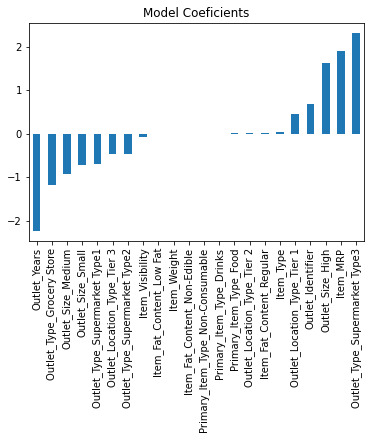

In [2094]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(LR.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

### 2. Ridge

Mean absolute error: 0.41752970831095326
Mean squared error: 0.2891336713349747
Root Mean squared error: 0.5377115131136534
R2 Score: 0.7240207837098154


<AxesSubplot:title={'center':'Model Coeficients'}>

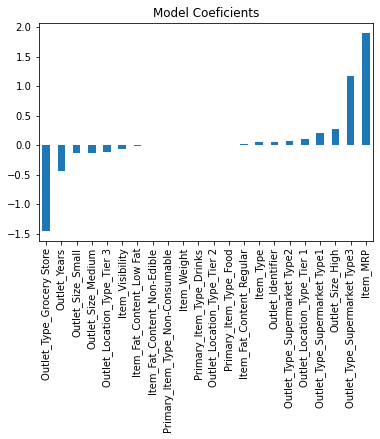

In [2095]:
R=Ridge()
R.fit(x_train,y_train)
pred=R.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(R.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

### 3. RandomForestRegressor

Mean absolute error: 0.4226635706258478
Mean squared error: 0.293900109787669
Root Mean squared error: 0.542125547993884
R2 Score: 0.7194711996278356


<AxesSubplot:title={'center':'Feature Importance'}>

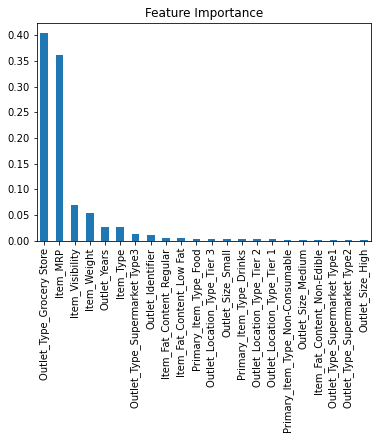

In [2096]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 4. GradientBoostingRegressor

Mean absolute error: 0.3968011130280154
Mean squared error: 0.26342144381951954
Root Mean squared error: 0.5132459876311938
R2 Score: 0.7485632050958362


<AxesSubplot:title={'center':'Feature Importance'}>

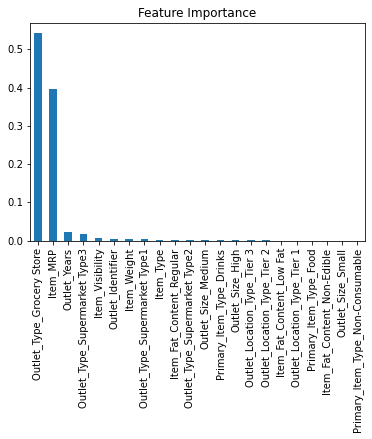

In [2097]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(GBR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 5. ExtraTreesRegressor

Mean absolute error: 0.44335527995074636
Mean squared error: 0.32055266118145703
Root Mean squared error: 0.5661737023047406
R2 Score: 0.6940312354347002


<AxesSubplot:title={'center':'Feature Importance'}>

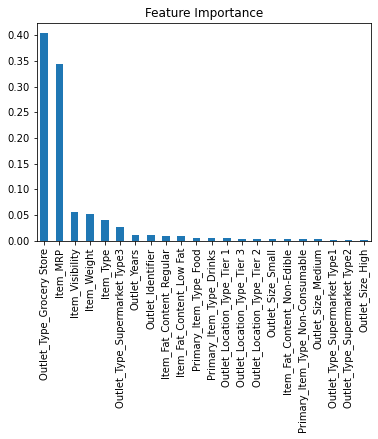

In [2098]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(ETR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 6. XGBRegressor

Mean absolute error: 0.4248393861722581
Mean squared error: 0.29895165172269317
Root Mean squared error: 0.5467647133115789
R2 Score: 0.71464948316068


<AxesSubplot:title={'center':'Feature Importance'}>

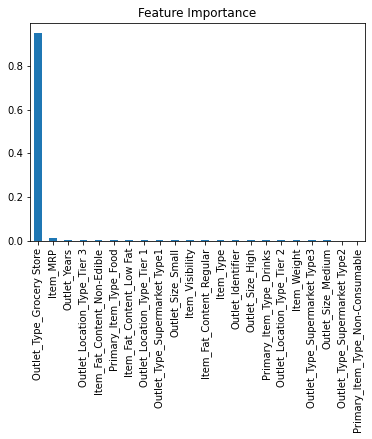

In [2099]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(XGB.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

Here, we observe that GradientBoostingRegressor is giving the highest R2 score of 75%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [2100]:
from sklearn.model_selection import cross_val_score

In [2101]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.7048926580104595


In [2102]:
print(cross_val_score(R,x,y,cv=5).mean()) #cross validation for Ridge

0.704634384879716


In [2103]:
print(cross_val_score(RFR,x,y,cv=5).mean()) #cross validation for RandomForestRegressor

0.6871136438162784


In [2104]:
print(cross_val_score(GBR,x,y,cv=5).mean()) #cross validation for GradientBoostingRegressor

0.7238610473842426


In [2105]:
print(cross_val_score(ETR,x,y,cv=5).mean()) #cross validation for ExtraTreesRegressor

0.6675995378974873


In [2106]:
print(cross_val_score(XGB,x,y,cv=5).mean()) #cross validation for XGBRegressor

0.6850562292168458


Here we observe that after doing cross validation LinearRegression is giving the least difference. We can definitely consider it as our best model.

### Hyper Parameter Tuning

Now, let's apply Hyper Paramter Tuning on the best model to improve the r2 score.

In [2107]:
from sklearn.model_selection import GridSearchCV

In [2108]:
parameters ={'fit_intercept':['True','False'],
            'positive':['True','False'],
            'n_jobs':[4,5,6,7,8,9],
            'copy_X':['True','False']}

In [2109]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [2110]:
GCV.fit(x,y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [4, 5, 6, 7, 8, 9],
                         'positive': ['True', 'False']})

In [2111]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 4, 'positive': 'True'}

In [2112]:
Final_mod=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=4,normalize=True)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

72.40794289165643


After Hyper Parameter tuning, the improved score of the best model RandomForestRegressor is 72.38%

### Predicting the Values for Test Data

In [2113]:
pred=Final_mod.predict(x_pred)

In [2114]:
pred

array([7.30078125, 7.09960938, 6.37304688, ..., 7.23242188, 8.11914062,
       6.92382812])

In [2115]:
#reversing the log transformation
predictions=np.expm1(pred)

In [2116]:
predictions

array([1480.45686377, 1210.49374231,  584.84009388, ..., 1382.56928157,
       3357.13360862, 1015.20270903])

## D] Saving the Model

In [2117]:
import joblib
joblib.dump(Final_mod,"BigDataMart.pkl")

['BigDataMart.pkl']